In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
traindata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_train.csv")
testdata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_test.csv")

In [4]:
traindata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
testdata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
traindata.shape

(27455, 785)

In [8]:
X_train = traindata.drop('label', axis = 1)
X_test = testdata.drop('label', axis = 1)

In [9]:
y_train = traindata['label'].values
y_test = testdata['label'].values

In [10]:
X_train = X_train.values
X_test = X_test.values

In [13]:
X_train=np.array(X_train.reshape(-1,28,28,1))
X_test=np.array(X_test.reshape(-1,28,28,1))

In [14]:
X_train.shape

(27455, 28, 28, 1)

In [15]:
labl = np.array(y_train)
np.unique(labl)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [16]:
from sklearn.preprocessing import LabelBinarizer
lab = LabelBinarizer()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [17]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

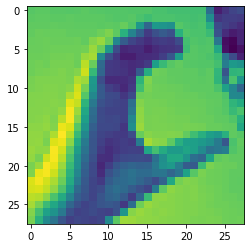

In [20]:
plt.imshow(X_train[2].reshape(28,28))

In [21]:
X_train = X_train/255
X_test = X_test/255

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(24, activation = "softmax")
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          3

In [28]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), batch_size = 128)

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 43s 2ms/sample - loss: 2.7811 - accuracy: 0.1442 - val_loss: 1.9288 - val_accuracy: 0.3832
Epoch 2/50
27455/27455 [==============================] - 47s 2ms/sample - loss: 1.4114 - accuracy: 0.5230 - val_loss: 0.9464 - val_accuracy: 0.6889
Epoch 3/50
27455/27455 [==============================] - 45s 2ms/sample - loss: 0.8924 - accuracy: 0.6937 - val_loss: 0.6323 - val_accuracy: 0.8107
Epoch 4/50
27455/27455 [==============================] - 45s 2ms/sample - loss: 0.6394 - accuracy: 0.7789 - val_loss: 0.5000 - val_accuracy: 0.8394
Epoch 5/50
27455/27455 [==============================] - 45s 2ms/sample - loss: 0.4857 - accuracy: 0.8313 - val_loss: 0.4118 - val_accuracy: 0.8723
Epoch 6/50
27455/27455 [==============================] - 45s 2ms/sample - loss: 0.3833 - accuracy: 0.8682 - val_loss: 0.3240 - val_accuracy: 0.8890
Epoch 7/50
27455/27455 [==============================] -

In [31]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

7172/7172 [==============================] - 6s 802us/sample - loss: 0.1675 - accuracy: 0.9568
Accuracy:0.9567764


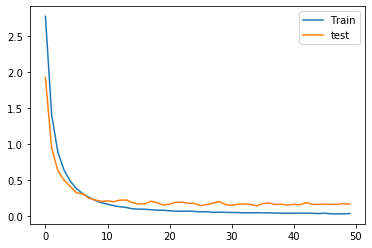

In [32]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['loss'] ,label='Train')
plt.plot(history.epoch,  history.history['val_loss'] ,label='test')
plt.legend()
plt.show()

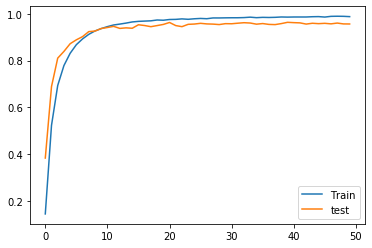

In [33]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['accuracy'] ,label='Train')
plt.plot(history.epoch,  history.history['val_accuracy'] ,label='test')
plt.legend()
plt.show()

In [34]:
json_model = model.to_json()
with open("asl.json", "w") as json_file:
    json_file.write(json_model)
model.save_weights('asl.h5')